In [1]:
import pandas as pd
df = pd.read_csv("games.csv")
#df.head()
df.info()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

platform_support = {
    "Windows": df['win'].sum(),
    "Mac":df['mac'].sum(),
    "Linux":df['linux'].sum()
}

C:\Users\cizhu\AppData\Local\Temp\ipykernel_8284\3944000855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


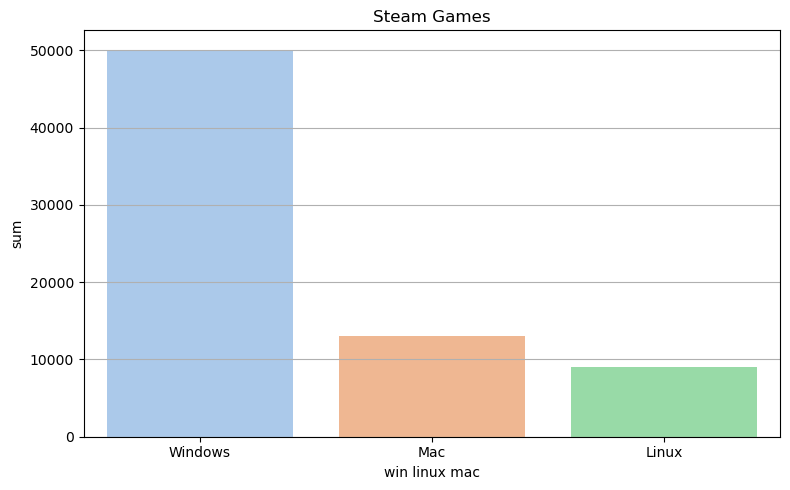

In [3]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=list(platform_support.keys()),
    y=list(platform_support.values()),
    palette='pastel'
)

plt.title("Steam Games")
plt.xlabel("win linux mac")
plt.ylabel("sum")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

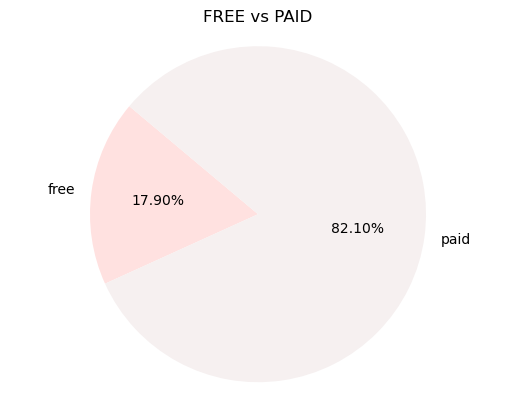

In [4]:
free_games = df[df['price_final'] == 0]
paid_games = df[df['price_final'] > 0]
counts = [len(free_games),len(paid_games)]
labels = ['free','paid']

plt.Figure(figsize=(6,6))
plt.pie(counts,labels=labels,autopct='%1.2f%%',colors=['#FFE1E0','#F6F0F0'], startangle=140)
plt.title("FREE vs PAID")
plt.axis('equal')
plt.show()

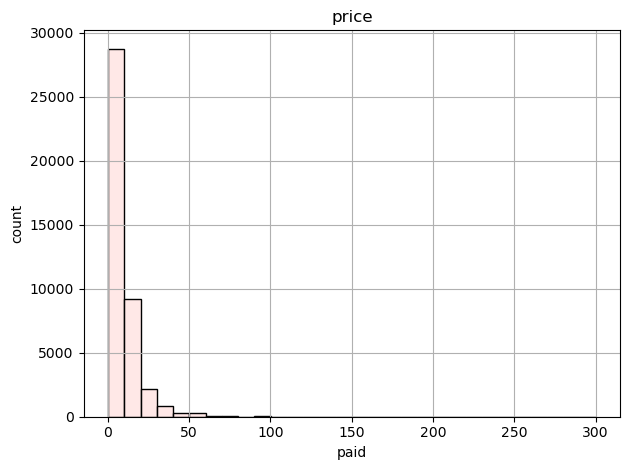

In [5]:
paid = df[df['price_final']>0]
plt.Figure(figsize=(8,5))
sns.histplot(paid_games['price_final'],bins=30,color='#FFE1E0')
plt.title("price")
plt.xlabel("paid")
plt.ylabel("count")
plt.grid(True)
plt.tight_layout()
plt.show()

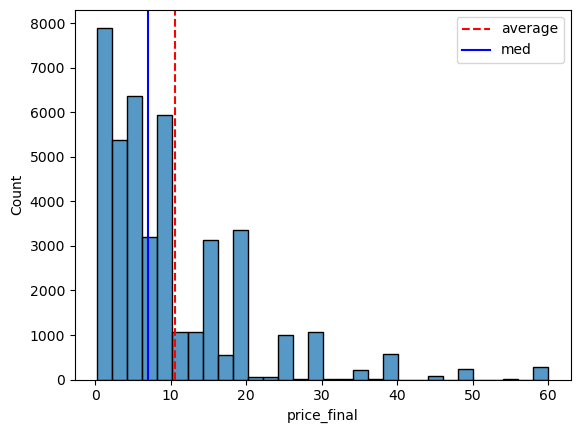

In [6]:
sns.histplot(paid[paid['price_final']<=60]['price_final'],bins=30)
plt.axvline(paid_games['price_final'].mean(), color='red', linestyle='--', label='average')
plt.axvline(paid_games['price_final'].median(), color='blue', linestyle='-', label='med')
plt.legend()


相關係數 = 0.021


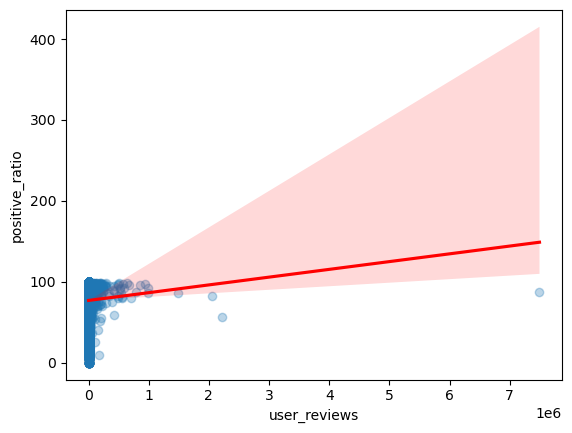

In [7]:
df_clean = df[['user_reviews', 'positive_ratio']].dropna()
sns.regplot(
    x='user_reviews',
    y='positive_ratio',
    data=df_clean,
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'}
)
corr = df_clean['user_reviews'].corr(df_clean['positive_ratio'])
print("相關係數 =", round(corr, 3))


C:\Users\cizhu\AppData\Local\Temp\ipykernel_8284\1517010411.py:10: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cizhu\AppData\Local\Temp\ipykernel_8284\1517010411.py:10: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cizhu\AppData\Local\Temp\ipykernel_8284\1517010411.py:10: UserWarning: Glyph 36938 (\N{CJK UNIFIED IDEOGRAPH-904A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cizhu\AppData\Local\Temp\ipykernel_8284\1517010411.py:10: UserWarning: Glyph 25138 (\N{CJK UNIFIED IDEOGRAPH-6232}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cizhu\AppData\Local\Temp\ipykernel_8284\1517010411.py:10: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cizhu\AppData\Local\Temp\ipykernel_8284\1517010411.py:10: UserWarning: Glyph 37327 (\N{CJK 

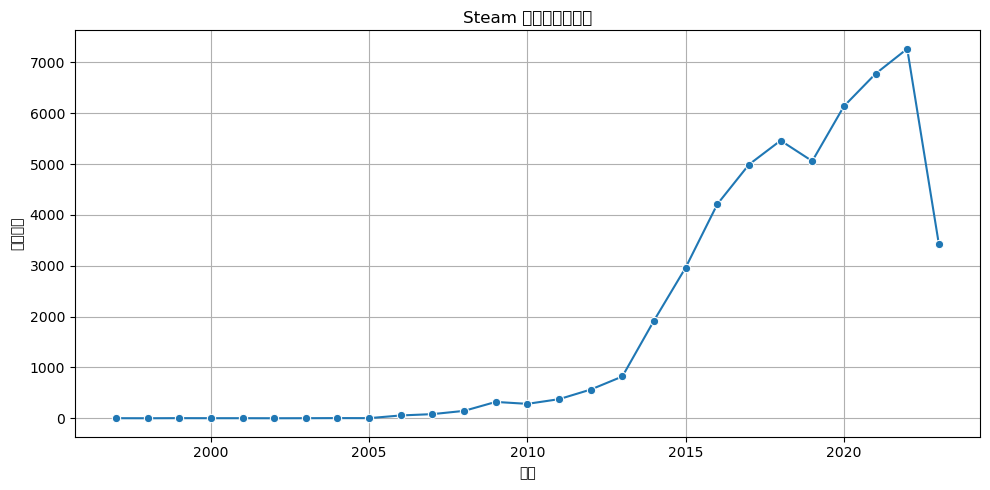

In [8]:
df['date_release'] = pd.to_datetime(df['date_release'],errors='coerce')
df['release_year'] = df['date_release'].dt.year
year_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.title("Steam 每年發行遊戲數")
plt.xlabel("年份")
plt.ylabel("遊戲數量")
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
filter = df[
    (df['price_final']< 5) &
    (df['positive_ratio'] >= 90) &
    (df['user_reviews'] > 1000)
]
top_games = filter.sort_values(by='user_reviews', ascending=False).head(20)
print(top_games[['title', 'price_final', 'positive_ratio', 'user_reviews']])


                            title  price_final  positive_ratio  user_reviews
47380             Team Fortress 2         0.00              93        985819
47791            Wallpaper Engine         4.00              98        637341
50781                    Among Us         3.00              92        587821
47637                    Unturned         0.00              91        515016
3372                Geometry Dash         4.00              93        239081
49905                  tModLoader         0.00              97        188684
18596  Doki Doki Literature Club!         0.00              96        184949
27666      SCP: Secret Laboratory         0.00              91        154538
15077                Titanfall® 2         3.00              94        154419
11968                   Crab Game         0.00              92        144524
41096                        Muck         0.00              94        139841
47494                 Tomb Raider         2.99              96        136055